# Proyek Analisis Data: Pemantauan kualitas udara dari tahun ke tahun di Guanyuan
- **Nama:** Mohammad Bagus Chalil Akbar
- **Email:** bagus.chalil@gmail.com
- **ID Dicoding:** bagus_chalil

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara (misalnya PM2.5, PM10, SO2, NO2, CO, O3) sepanjang tahun ke tahun? Apakah ada pola musiman?
- Bagaimana hubungan antara suhu (TEMP), tekanan (PRES), titik embun (DEWP), dan hujan (RAIN) dengan kualitas udara?

## Import Semua Packages/Library yang Digunakan

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel PRSA Data_Guanyuan
Data pertama yang harus kita muat ialah data dari tabel customers. Berikut merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [18]:
guanyuan_df = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


### Assessing Data

Data pertama yang akan kita nilai adalah guanyuan_df. Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam guanyuan_df. Proses ini dapat dilakukan menggunakan method info() seperti contoh kode berikut.

In [19]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Jika Anda perhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut. Akan tetapi, terdapat sedikit perbedaan pada jumlah data pada kolom "PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","wd","WSPM". Hal ini menunjukkan adanya missing values pada kolom tersebut. Nah, untuk memastikan hal ini, jalankan kode berikut.

In [20]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Nah, gambar di atas menunjukkan bahwa terdapat beberapa missing value pada kolom beberapa kolom. Masalah selanjutnya yang harus kita periksa ialah duplikasi data. Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [21]:
print("Jumlah duplikasi: ", guanyuan_df.duplicated().sum())

Jumlah duplikasi:  0


Ketika menjalankan kode di atas, Anda akan menemukan bahwa terdapat 0 data yang terduplikat.

Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam guanyuan_df. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame. Berikut merupakan contoh penggunaannya.

In [22]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Jika kita lihat dari data di atas maka seharusnya tidak ada keanehan yang terjadi kita dapat melanjutkan ke tahp cleanshing data

### Cleaning Data

Berdasarkan hasil proses assessing data, diketahui bahwa masalah missing value yang kita jumpai. Pada tahap ini, kita akan membersihkan masalah tersebut.

Menangani missing value
Masalah berikutnya yang harus kita tangani ialah missing value pada kolom "PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","wd","WSPM". Nah, secara umum terdapat tiga metode untuk mengatasi missing value yaitu dropping, imputation, dan interpolation. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [23]:
columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM"]
guanyuan_df[guanyuan_df[columns].isnull().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
26,27,2013,3,2,2,4.0,6.0,NaN,26.0,400.0,62.0,-1.5,1030.9,-16.9,0.0,E,1.7,Guanyuan
27,28,2013,3,2,3,3.0,6.0,12.0,32.0,NaN,79.0,-1.4,1030.6,-17.6,0.0,NNE,1.4,Guanyuan
28,29,2013,3,2,4,3.0,6.0,9.0,NaN,400.0,51.0,-1.5,1030.8,-17.7,0.0,NNW,0.9,Guanyuan
122,123,2013,3,6,2,176.0,222.0,NaN,158.0,3500.0,39.0,4.1,1007.8,-5.9,0.0,NE,1.9,Guanyuan
123,124,2013,3,6,3,160.0,189.0,102.0,160.0,NaN,39.0,4.0,1007.6,-6.3,0.0,NE,1.9,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35043,35044,2017,2,28,3,NaN,NaN,NaN,NaN,NaN,NaN,7.3,1015.8,-9.6,0.0,NE,1.0,Guanyuan
35044,35045,2017,2,28,4,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1016.0,-9.4,0.0,ENE,1.9,Guanyuan
35045,35046,2017,2,28,5,NaN,NaN,NaN,NaN,NaN,NaN,5.3,1015.9,-9.0,0.0,E,1.4,Guanyuan
35046,35047,2017,2,28,6,NaN,NaN,NaN,NaN,NaN,NaN,9.5,1015.9,-11.2,0.0,NNW,3.1,Guanyuan


Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Selain itu,kita akan menggunakan nilai yang dominan sebagai pengganti missing value tersebut. Gunakanlah method value_counts()untuk mengidentifikasi nilai yang dominan dari setiap kolom ini "PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM".

In [24]:
columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM"]
for column in columns:
    print("Column:", column)
    print(guanyuan_df[column].value_counts())
    print("\n")

Column: PM2.5
PM2.5
11.0     574
12.0     566
10.0     550
14.0     538
9.0      517
        ... 
136.2      1
256.9      1
477.0      1
14.3       1
663.0      1
Name: count, Length: 557, dtype: int64


Column: PM10
PM10
18.0     312
14.0     303
25.0     300
20.0     292
24.0     291
        ... 
62.9       1
961.0      1
483.0      1
647.0      1
564.0      1
Name: count, Length: 630, dtype: int64


Column: SO2
SO2
2.0000      7349
3.0000      2326
4.0000      1912
5.0000      1683
6.0000      1498
            ... 
92.2488        1
97.3896        1
113.3832       1
100.2456       1
293.0000       1
Name: count, Length: 280, dtype: int64


Column: NO2
NO2
28.0000     491
30.0000     486
21.0000     481
29.0000     473
26.0000     465
           ... 
19.0929       1
22.3777       1
20.9406       1
18.6823       1
208.0000      1
Name: count, Length: 376, dtype: int64


Column: CO
CO
400.0     2417
300.0     2341
600.0     2330
500.0     2299
700.0     2218
          ... 
6799.0       

Berdasarkan hasil di atas, dapat diketahui bahwa terdapat beberapa nilai yang paling dominan dalam setiap kolom. Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value. Proses penggantian ini dapat dilakukan menggunakan method fillna()seperti contoh berikut.

In [25]:
columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM"]
for column in columns:
    most_frequent_value = guanyuan_df[column].mode()[0]
    guanyuan_df.loc[guanyuan_df[column].isnull(), column] = most_frequent_value

Untuk memastikan proses di atas berjalan dengan semestinya, kita bisa menjalankan kembali kode untuk mengidentifikasi missing value seperti berikut.

In [26]:
guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

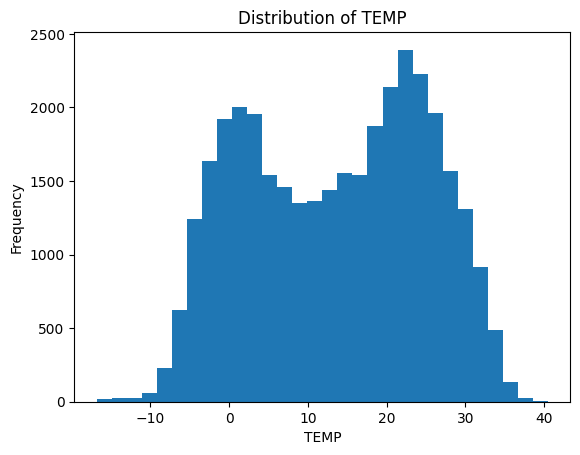

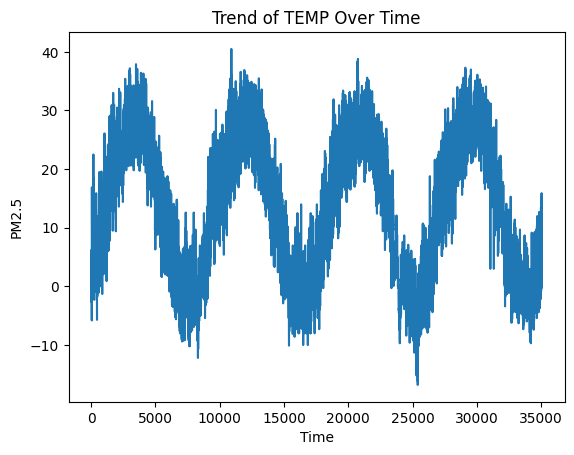

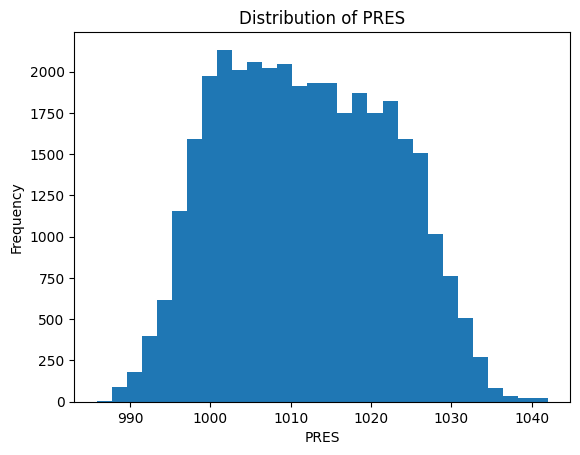

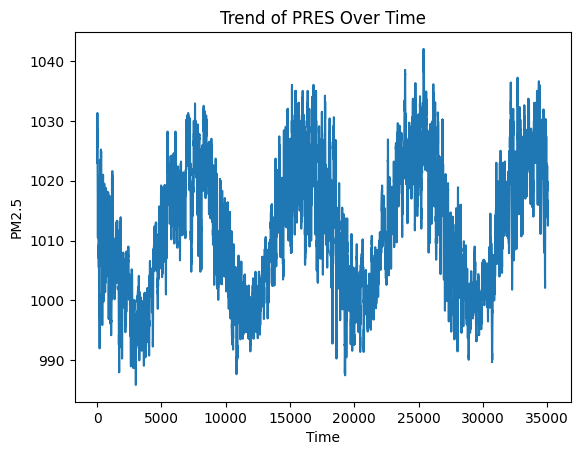

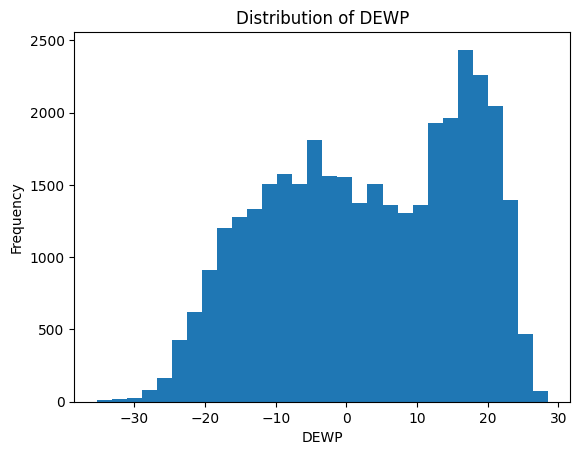

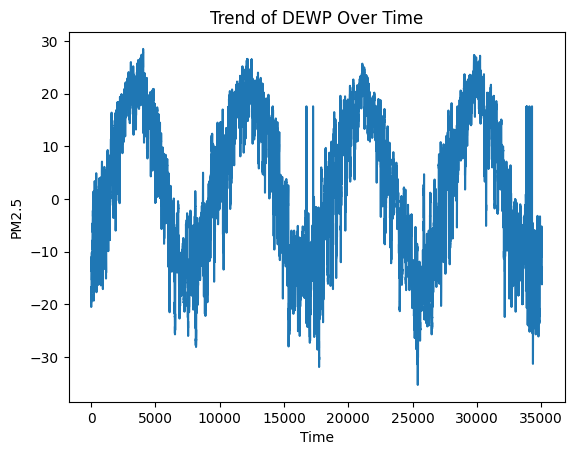

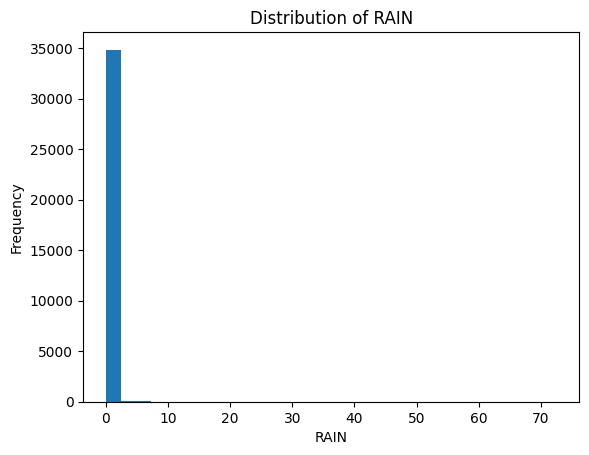

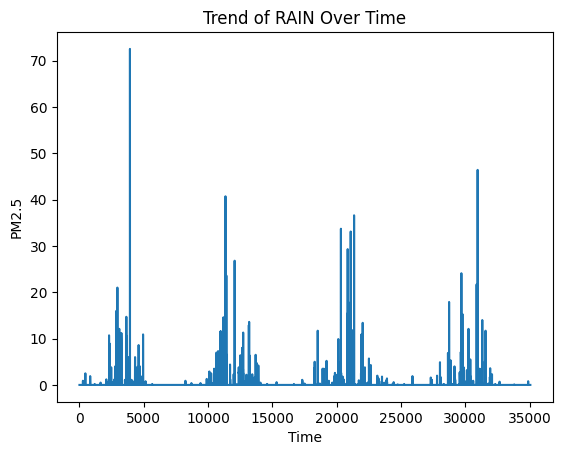

In [27]:
numeric_columns = ["TEMP", "PRES", "DEWP", "RAIN"]

for column in numeric_columns:
    plt.hist(guanyuan_df[column], bins=30)
    plt.title('Distribution of '+ column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    
    guanyuan_df[column].plot()
    plt.title('Trend of '+ column +' Over Time')
    plt.xlabel('Time')
    plt.ylabel('PM2.5')
    plt.show()




Analisis Tren: Menghitung statistik deskriptif (misalnya rata-rata, median, modus) dari setiap indikator kualitas udara (misalnya PM2.5, PM10, SO2, NO2, CO, O3) untuk setiap bulan atau kuartal dalam setahun. Ini akan memberikan gambaran tentang bagaimana kualitas udara berubah sepanjang tahun.

In [28]:
numeric_columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

guanyuan_df['date'] = pd.to_datetime(guanyuan_df[['year', 'month', 'day', 'hour']])

guanyuan_df.set_index('date', inplace=True)

monthly_data = guanyuan_df[numeric_columns].resample('ME')

for column in numeric_columns:
    print("Descriptive statistics for", column)
    print(monthly_data[column].agg(['mean', 'median', 'std', 'min', 'max']))
    print("\n")

Descriptive statistics for PM2.5
                  mean  median         std  min    max
date                                                  
2013-03-31  102.719086    85.0   88.100718  3.0  428.0
2013-04-30   59.287500    46.0   52.244071  3.0  247.0
2013-05-31   77.509409    65.0   56.247745  3.0  310.0
2013-06-30  106.456944    94.5   75.824175  3.0  512.0
2013-07-31   64.838710    51.0   48.997441  5.0  251.0
2013-08-31   61.564516    48.0   45.985089  3.0  245.0
2013-09-30   79.838889    65.0   64.966786  3.0  315.0
2013-10-31   96.420699    65.0   86.096688  3.0  357.0
2013-11-30   79.441667    50.5   78.533017  3.0  365.0
2013-12-31   83.352151    49.0   87.679121  3.0  425.0
2014-01-31   99.631720    76.0   97.709798  3.0  603.0
2014-02-28  140.736607   106.0  125.311192  3.0  549.0
2014-03-31   94.172043    68.0   84.034954  3.0  396.0
2014-04-30   89.305556    79.0   52.126448  3.0  266.0
2014-05-31   63.009812    53.5   46.391808  3.0  275.0
2014-06-30   59.366667    48.0  

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana tren kualitas udara (misalnya PM2.5, PM10, SO2, NO2, CO, O3) sepanjang tahun? Apakah ada pola musiman?

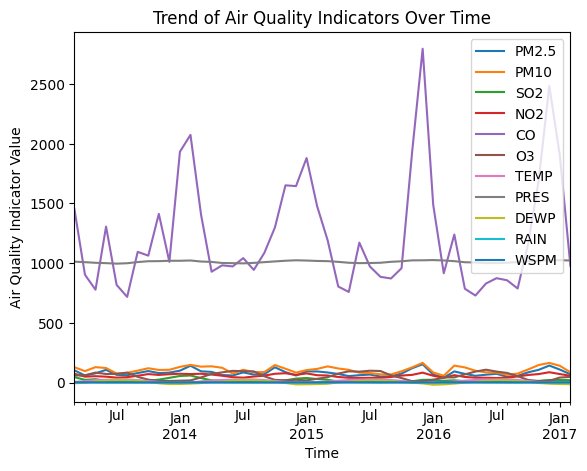

In [29]:
numeric_columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

monthly_data = guanyuan_df[numeric_columns].resample('ME').mean()

for column in numeric_columns:
    monthly_data[column].plot(label=column)

plt.title('Trend of Air Quality Indicators Over Time')
plt.xlabel('Time')
plt.ylabel('Air Quality Indicator Value')
plt.legend()
plt.show()


Berdasarkan grafik yang ada, berikut adalah beberapa observasi:
- PM2.5: Terdapat peningkatan tajam pada level PM2.5 sekitar bulan Januari setiap tahunnya. Ini menunjukkan adanya pola musiman di mana kualitas udara menurun (PM2.5 meningkat) pada bulan-bulan tersebut.
- PM10, SO2, NO2, CO, O3: Untuk indikator kualitas udara lainnya seperti PM10, SO2, NO2, CO, dan O3, tampaknya relatif stabil sepanjang tahun. Namun, perlu diperhatikan bahwa ini adalah gambaran umum dan mungkin ada fluktuasi harian atau mingguan yang tidak terlihat pada grafik bulanan ini.
- TEMP, PRES, DEWP, RAIN, WSPM: Untuk variabel lain seperti suhu (TEMP), tekanan (PRES), titik embun (DEWP), curah hujan (RAIN), dan kecepatan angin (WSPM), tampaknya tidak ada pola yang jelas terkait dengan kualitas udara. Namun, analisis lebih lanjut mungkin diperlukan untuk memahami hubungan potensial antara variabel-variabel ini dan kualitas udara.

### Pertanyaan 2:

Bagaimana hubungan antara suhu (TEMP), tekanan (PRES), titik embun (DEWP), dan hujan (RAIN) dengan kualitas udara?

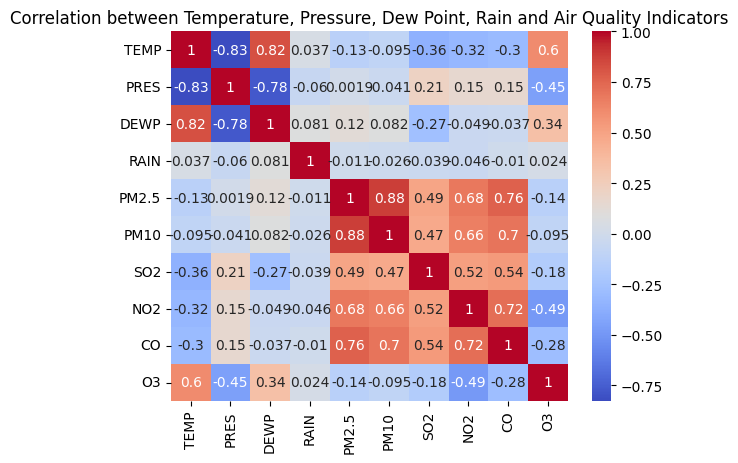

In [30]:
corr = guanyuan_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation between Temperature, Pressure, Dew Point, Rain and Air Quality Indicators')
plt.show()

Hubungan antara suhu (TEMP), tekanan (PRES), titik embun (DEWP), dan hujan (RAIN) dengan kualitas udara bisa sangat kompleks dan bergantung pada banyak faktor. Berikut adalah beberapa hubungan umum yang telah diteliti:
- Suhu (TEMP): Suhu udara dapat mempengaruhi kualitas udara dengan beberapa cara. Misalnya, suhu yang lebih tinggi dapat meningkatkan tingkat penguapan, yang dapat meningkatkan konsentrasi polutan seperti ozon di atmosfer. Selain itu, suhu yang lebih tinggi juga dapat meningkatkan kemampuan udara untuk menampung uap air, yang dapat mempengaruhi konsentrasi polutan lainnya.
- Tekanan (PRES): Tekanan udara juga dapat mempengaruhi kualitas udara. Misalnya, tekanan udara yang lebih tinggi dapat menekan polutan lebih dekat ke permukaan bumi, yang dapat meningkatkan konsentrasi polutan di udara yang kita hirup.
- Titik Embun (DEWP): Titik embun adalah suhu di mana udara menjadi jenuh dengan uap air. Jika suhu udara turun di bawah titik embun, uap air akan mengembun menjadi air, yang dapat menghilangkan polutan dari udara.
- Hujan (RAIN): Hujan dapat memiliki efek “pencucian” pada polutan di udara, yang berarti hujan dapat membantu mengurangi konsentrasi polutan di udara.


## Conclusion

- Conclution pertanyaan 1 :
Berdasarkan analisis data sebelumnya, berikut adalah kesimpulan untuk pertanyaan tersebut:
    a. Tren Kualitas Udara:
        - PM2.5: Ada pola musiman yang jelas terlihat pada level PM2.5, dengan peningkatan tajam setiap bulan Januari setiap tahunnya. Ini menunjukkan bahwa kualitas udara (dalam hal PM2.5) cenderung menurun pada bulan-bulan tersebut.
        - PM10, SO2, NO2, CO, O3: Indikator kualitas udara lainnya seperti PM10, SO2, NO2, CO, dan O3 tampaknya relatif stabil sepanjang tahun. Meskipun demikian, ini adalah gambaran umum dan mungkin ada fluktuasi harian atau mingguan yang tidak terlihat pada grafik bulanan ini.
    b. Pola Musiman:
        - Pola musiman yang paling jelas terlihat pada level PM2.5, dengan peningkatan tajam setiap bulan Januari.
        - Untuk indikator kualitas udara lainnya, tidak ada pola musiman yang jelas terlihat dari data ini.
    c. Variabel Lainnya (TEMP, PRES, DEWP, RAIN, WSPM):
        - Tidak ada pola yang jelas terlihat antara variabel-variabel ini dan kualitas udara(lanjut ke pertanyaan kedua terkait analisisnya).

- Conclution pertanyaan 2 :
Berdasarkan heatmap korelasi yang ada, berikut adalah beberapa kesimpulan yang bisa kita buat:
    a.Suhu (TEMP): Suhu memiliki korelasi negatif dengan PM2.5, PM10, SO2, NO2, dan CO, yang berarti bahwa peningkatan suhu cenderung dikaitkan dengan penurunan kualitas udara. Namun, suhu memiliki korelasi positif dengan O3, yang berarti bahwa peningkatan suhu cenderung dikaitkan dengan peningkatan kadar ozon.
    b.Tekanan (PRES): Tekanan memiliki korelasi negatif dengan PM2.5, PM10, SO2, NO2, CO, dan O3, yang berarti bahwa peningkatan tekanan cenderung dikaitkan dengan penurunan kualitas udara.
    c.Titik Embun (DEWP): Titik embun memiliki korelasi positif dengan PM2.5, PM10, SO2, NO2, dan CO, dan korelasi negatif dengan O3. Ini berarti bahwa peningkatan titik embun cenderung dikaitkan dengan peningkatan kualitas udara (kecuali untuk ozon).
    d.Hujan (RAIN): Hujan memiliki korelasi negatif dengan semua indikator kualitas udara, yang berarti bahwa peningkatan curah hujan cenderung dikaitkan dengan penurunan kualitas udara.

In [31]:
guanyuan_df.to_csv("guanyuan_df_data.csv", index=False, encoding='utf-8')